In [2]:
import pandas as pd
import sklearn
import sklearn.model_selection
# from autoPyTorch.api.tabular_classification import TabularClassificationTask
#from autoPyTorch.api.tabular_regression import TabularRegressionTask
from matplotlib import pyplot as plt
import numpy as np
#from torch import nn, optim
#import torch
#import torch.nn.functional as F
import catboost

In [3]:
data = pd.read_csv( "../training_from_eph.csv" )

In [4]:
y = data.output
X = data.loc[:,data.columns[5:]]
#y[0] = .999 #This is a hack so that the regressor doesn't think this is state data.

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    random_state=1,
)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [5]:
X_train.head()

,f1:sourceCorpusPermutationsFrequencyRatio,f2:targetCorpusPermutationsFrequencyRatio,f3:sourceAlignmentMemoryFrequencyRatio,f4:targetAlignmentMemoryFrequencyRatio,f5:frequencyRatioCorpusFiltered,f6:frequencyRatioAlignmentMemoryFiltered,f7:sourceCorpusLemmaPermutationsFrequencyRatio,f8:targetCorpusLemmaPermutationsFrequencyRatio,f9:sourceAlignmentMemoryLemmaFrequencyRatio,f10:targetAlignmentMemoryLemmaFrequencyRatio,...,f14:alignmentRelativeOccurrence,f15:alignmentPosition,f16:phrasePlausibility,f17:lemmaPhrasePlausibility,f18:ngramLength,f19:characterLength,f20:alignmentOccurrences,f21:lemmaAlignmentOccurrences,f22:uniqueness,f23:lemmaUniqueness
0,0.015267,0.002949,0,0,1.0,0,0.015267,0.002949,0,0,...,NaN,0.000000,1.000000,0,0.000000,0.000000,0.0,0,0.000000,0
1,0.023256,0.030303,0,0,1.0,0,0.000000,0.000000,0,0,...,1.0,0.415584,0.780110,0,0.773781,0.853483,1.0,0,0.608571,0
2,0.010309,0.025641,0,0,0.5,0,0.000000,0.000000,0,0,...,NaN,0.908654,0.390055,0,0.918612,0.849787,0.5,0,0.152143,0
3,0.025000,0.033333,0,0,1.0,0,0.000000,0.000000,0,0,...,1.0,0.507692,0.780110,0,0.498793,0.972239,1.0,0,0.608571,0
4,0.025000,0.033333,0,0,1.0,0,0.000000,0.000000,0,0,...,1.0,0.992308,0.780110,0,0.498793,0.488317,1.0,0,0.608571,0


In [6]:
from catboost import CatBoostRegressor, Pool

In [7]:
train_pool = Pool(
    data=X_train,
    label=y_train
)
validation_pool = Pool(
    data=X_test,
    label=y_test
)

In [8]:
model = CatBoostRegressor(
    iterations=1000,
    #task_type="GPU",
    learning_rate=.07
)
model.fit(train_pool, eval_set=validation_pool, verbose=True, plot=True)

print( 'Model is fitted: {}',format(model.is_fitted()))
print('Model params:\n{}'.format(model.get_params()))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0703254	test: 0.0687853	best: 0.0687853 (0)	total: 53.8ms	remaining: 53.7s
1:	learn: 0.0695646	test: 0.0682021	best: 0.0682021 (1)	total: 58ms	remaining: 28.9s
2:	learn: 0.0688775	test: 0.0676961	best: 0.0676961 (2)	total: 62.2ms	remaining: 20.7s
3:	learn: 0.0682756	test: 0.0672204	best: 0.0672204 (3)	total: 66.3ms	remaining: 16.5s
4:	learn: 0.0675531	test: 0.0665048	best: 0.0665048 (4)	total: 74.4ms	remaining: 14.8s
5:	learn: 0.0670277	test: 0.0661133	best: 0.0661133 (5)	total: 78.4ms	remaining: 13s
6:	learn: 0.0666067	test: 0.0657627	best: 0.0657627 (6)	total: 82.4ms	remaining: 11.7s
7:	learn: 0.0662109	test: 0.0654762	best: 0.0654762 (7)	total: 86.4ms	remaining: 10.7s
8:	learn: 0.0658351	test: 0.0651658	best: 0.0651658 (8)	total: 90.5ms	remaining: 9.96s
9:	learn: 0.0653594	test: 0.0646964	best: 0.0646964 (9)	total: 95.4ms	remaining: 9.45s
10:	learn: 0.0648438	test: 0.0642170	best: 0.0642170 (10)	total: 99.4ms	remaining: 8.94s
11:	learn: 0.0645481	test: 0.0640668	best: 0.

136:	learn: 0.0558704	test: 0.0585594	best: 0.0585539 (135)	total: 644ms	remaining: 4.05s
137:	learn: 0.0558155	test: 0.0585325	best: 0.0585325 (137)	total: 649ms	remaining: 4.05s
138:	learn: 0.0557635	test: 0.0585094	best: 0.0585094 (138)	total: 654ms	remaining: 4.05s
139:	learn: 0.0557251	test: 0.0584738	best: 0.0584738 (139)	total: 660ms	remaining: 4.05s
140:	learn: 0.0556882	test: 0.0584927	best: 0.0584738 (139)	total: 664ms	remaining: 4.04s
141:	learn: 0.0556399	test: 0.0584586	best: 0.0584586 (141)	total: 667ms	remaining: 4.03s
142:	learn: 0.0556355	test: 0.0584574	best: 0.0584574 (142)	total: 671ms	remaining: 4.02s
143:	learn: 0.0556181	test: 0.0584399	best: 0.0584399 (143)	total: 675ms	remaining: 4.01s
144:	learn: 0.0555940	test: 0.0584550	best: 0.0584399 (143)	total: 678ms	remaining: 4s
145:	learn: 0.0555733	test: 0.0584480	best: 0.0584399 (143)	total: 682ms	remaining: 3.99s
146:	learn: 0.0555469	test: 0.0584440	best: 0.0584399 (143)	total: 686ms	remaining: 3.98s
147:	learn: 0

232:	learn: 0.0534221	test: 0.0578471	best: 0.0578431 (231)	total: 1.04s	remaining: 3.42s
233:	learn: 0.0533996	test: 0.0578460	best: 0.0578431 (231)	total: 1.05s	remaining: 3.43s
234:	learn: 0.0533805	test: 0.0578499	best: 0.0578431 (231)	total: 1.05s	remaining: 3.43s
235:	learn: 0.0533670	test: 0.0578344	best: 0.0578344 (235)	total: 1.06s	remaining: 3.42s
236:	learn: 0.0533278	test: 0.0578359	best: 0.0578344 (235)	total: 1.06s	remaining: 3.42s
237:	learn: 0.0533145	test: 0.0578265	best: 0.0578265 (237)	total: 1.06s	remaining: 3.41s
238:	learn: 0.0532947	test: 0.0578309	best: 0.0578265 (237)	total: 1.07s	remaining: 3.4s
239:	learn: 0.0532730	test: 0.0578322	best: 0.0578265 (237)	total: 1.07s	remaining: 3.4s
240:	learn: 0.0532328	test: 0.0578368	best: 0.0578265 (237)	total: 1.08s	remaining: 3.39s
241:	learn: 0.0532190	test: 0.0578390	best: 0.0578265 (237)	total: 1.08s	remaining: 3.38s
242:	learn: 0.0531975	test: 0.0578240	best: 0.0578240 (242)	total: 1.08s	remaining: 3.37s
243:	learn: 

334:	learn: 0.0512970	test: 0.0573490	best: 0.0573490 (334)	total: 1.43s	remaining: 2.84s
335:	learn: 0.0512842	test: 0.0573328	best: 0.0573328 (335)	total: 1.43s	remaining: 2.83s
336:	learn: 0.0512711	test: 0.0573202	best: 0.0573202 (336)	total: 1.44s	remaining: 2.83s
337:	learn: 0.0512695	test: 0.0573229	best: 0.0573202 (336)	total: 1.44s	remaining: 2.83s
338:	learn: 0.0512588	test: 0.0573160	best: 0.0573160 (338)	total: 1.45s	remaining: 2.82s
339:	learn: 0.0512244	test: 0.0573219	best: 0.0573160 (338)	total: 1.45s	remaining: 2.82s
340:	learn: 0.0512162	test: 0.0573258	best: 0.0573160 (338)	total: 1.46s	remaining: 2.82s
341:	learn: 0.0512086	test: 0.0573186	best: 0.0573160 (338)	total: 1.46s	remaining: 2.81s
342:	learn: 0.0511945	test: 0.0573289	best: 0.0573160 (338)	total: 1.47s	remaining: 2.81s
343:	learn: 0.0511618	test: 0.0573387	best: 0.0573160 (338)	total: 1.47s	remaining: 2.8s
344:	learn: 0.0511521	test: 0.0573324	best: 0.0573160 (338)	total: 1.47s	remaining: 2.8s
345:	learn: 

433:	learn: 0.0499402	test: 0.0574504	best: 0.0572854 (359)	total: 1.82s	remaining: 2.37s
434:	learn: 0.0499396	test: 0.0574524	best: 0.0572854 (359)	total: 1.82s	remaining: 2.37s
435:	learn: 0.0499290	test: 0.0574538	best: 0.0572854 (359)	total: 1.83s	remaining: 2.36s
436:	learn: 0.0499069	test: 0.0574585	best: 0.0572854 (359)	total: 1.83s	remaining: 2.36s
437:	learn: 0.0498908	test: 0.0574605	best: 0.0572854 (359)	total: 1.84s	remaining: 2.36s
438:	learn: 0.0498875	test: 0.0574667	best: 0.0572854 (359)	total: 1.84s	remaining: 2.35s
439:	learn: 0.0498647	test: 0.0574580	best: 0.0572854 (359)	total: 1.85s	remaining: 2.35s
440:	learn: 0.0498454	test: 0.0574701	best: 0.0572854 (359)	total: 1.85s	remaining: 2.35s
441:	learn: 0.0498422	test: 0.0574766	best: 0.0572854 (359)	total: 1.85s	remaining: 2.34s
442:	learn: 0.0498392	test: 0.0574832	best: 0.0572854 (359)	total: 1.86s	remaining: 2.34s
443:	learn: 0.0498202	test: 0.0574784	best: 0.0572854 (359)	total: 1.86s	remaining: 2.33s
444:	learn

537:	learn: 0.0486190	test: 0.0575313	best: 0.0572854 (359)	total: 2.21s	remaining: 1.9s
538:	learn: 0.0486156	test: 0.0575311	best: 0.0572854 (359)	total: 2.21s	remaining: 1.89s
539:	learn: 0.0486124	test: 0.0575309	best: 0.0572854 (359)	total: 2.22s	remaining: 1.89s
540:	learn: 0.0486065	test: 0.0575326	best: 0.0572854 (359)	total: 2.22s	remaining: 1.88s
541:	learn: 0.0486035	test: 0.0575323	best: 0.0572854 (359)	total: 2.22s	remaining: 1.88s
542:	learn: 0.0485981	test: 0.0575340	best: 0.0572854 (359)	total: 2.23s	remaining: 1.87s
543:	learn: 0.0485928	test: 0.0575409	best: 0.0572854 (359)	total: 2.23s	remaining: 1.87s
544:	learn: 0.0485821	test: 0.0575411	best: 0.0572854 (359)	total: 2.23s	remaining: 1.86s
545:	learn: 0.0485731	test: 0.0575453	best: 0.0572854 (359)	total: 2.24s	remaining: 1.86s
546:	learn: 0.0485691	test: 0.0575528	best: 0.0572854 (359)	total: 2.24s	remaining: 1.85s
547:	learn: 0.0485570	test: 0.0575452	best: 0.0572854 (359)	total: 2.24s	remaining: 1.85s
548:	learn:

645:	learn: 0.0475892	test: 0.0576456	best: 0.0572854 (359)	total: 2.6s	remaining: 1.42s
646:	learn: 0.0475849	test: 0.0576474	best: 0.0572854 (359)	total: 2.6s	remaining: 1.42s
647:	learn: 0.0475749	test: 0.0576467	best: 0.0572854 (359)	total: 2.6s	remaining: 1.42s
648:	learn: 0.0475478	test: 0.0576543	best: 0.0572854 (359)	total: 2.61s	remaining: 1.41s
649:	learn: 0.0475360	test: 0.0576543	best: 0.0572854 (359)	total: 2.61s	remaining: 1.41s
650:	learn: 0.0475247	test: 0.0576591	best: 0.0572854 (359)	total: 2.62s	remaining: 1.4s
651:	learn: 0.0475163	test: 0.0576626	best: 0.0572854 (359)	total: 2.62s	remaining: 1.4s
652:	learn: 0.0475070	test: 0.0576721	best: 0.0572854 (359)	total: 2.63s	remaining: 1.4s
653:	learn: 0.0474816	test: 0.0576661	best: 0.0572854 (359)	total: 2.63s	remaining: 1.39s
654:	learn: 0.0474678	test: 0.0576745	best: 0.0572854 (359)	total: 2.63s	remaining: 1.39s
655:	learn: 0.0474543	test: 0.0576690	best: 0.0572854 (359)	total: 2.64s	remaining: 1.38s
656:	learn: 0.04

740:	learn: 0.0464804	test: 0.0577483	best: 0.0572854 (359)	total: 3.01s	remaining: 1.05s
741:	learn: 0.0464632	test: 0.0577534	best: 0.0572854 (359)	total: 3.02s	remaining: 1.05s
742:	learn: 0.0464558	test: 0.0577531	best: 0.0572854 (359)	total: 3.02s	remaining: 1.04s
743:	learn: 0.0464475	test: 0.0577558	best: 0.0572854 (359)	total: 3.02s	remaining: 1.04s
744:	learn: 0.0464350	test: 0.0577580	best: 0.0572854 (359)	total: 3.03s	remaining: 1.04s
745:	learn: 0.0464203	test: 0.0577661	best: 0.0572854 (359)	total: 3.03s	remaining: 1.03s
746:	learn: 0.0464152	test: 0.0577670	best: 0.0572854 (359)	total: 3.04s	remaining: 1.03s
747:	learn: 0.0463953	test: 0.0577715	best: 0.0572854 (359)	total: 3.04s	remaining: 1.02s
748:	learn: 0.0463790	test: 0.0577789	best: 0.0572854 (359)	total: 3.04s	remaining: 1.02s
749:	learn: 0.0463640	test: 0.0577770	best: 0.0572854 (359)	total: 3.05s	remaining: 1.01s
750:	learn: 0.0463533	test: 0.0577776	best: 0.0572854 (359)	total: 3.05s	remaining: 1.01s
751:	learn

846:	learn: 0.0454275	test: 0.0578835	best: 0.0572854 (359)	total: 3.41s	remaining: 615ms
847:	learn: 0.0454095	test: 0.0578906	best: 0.0572854 (359)	total: 3.41s	remaining: 611ms
848:	learn: 0.0453934	test: 0.0578930	best: 0.0572854 (359)	total: 3.41s	remaining: 607ms
849:	learn: 0.0453921	test: 0.0578940	best: 0.0572854 (359)	total: 3.42s	remaining: 603ms
850:	learn: 0.0453830	test: 0.0578946	best: 0.0572854 (359)	total: 3.42s	remaining: 599ms
851:	learn: 0.0453774	test: 0.0578985	best: 0.0572854 (359)	total: 3.43s	remaining: 595ms
852:	learn: 0.0453689	test: 0.0578994	best: 0.0572854 (359)	total: 3.43s	remaining: 591ms
853:	learn: 0.0453550	test: 0.0579018	best: 0.0572854 (359)	total: 3.43s	remaining: 587ms
854:	learn: 0.0453433	test: 0.0578820	best: 0.0572854 (359)	total: 3.44s	remaining: 583ms
855:	learn: 0.0453420	test: 0.0578831	best: 0.0572854 (359)	total: 3.44s	remaining: 579ms
856:	learn: 0.0453364	test: 0.0578843	best: 0.0572854 (359)	total: 3.44s	remaining: 575ms
857:	learn

948:	learn: 0.0446139	test: 0.0579370	best: 0.0572854 (359)	total: 3.79s	remaining: 204ms
949:	learn: 0.0446036	test: 0.0579366	best: 0.0572854 (359)	total: 3.8s	remaining: 200ms
950:	learn: 0.0445996	test: 0.0579361	best: 0.0572854 (359)	total: 3.8s	remaining: 196ms
951:	learn: 0.0445863	test: 0.0579254	best: 0.0572854 (359)	total: 3.81s	remaining: 192ms
952:	learn: 0.0445816	test: 0.0579268	best: 0.0572854 (359)	total: 3.81s	remaining: 188ms
953:	learn: 0.0445752	test: 0.0579298	best: 0.0572854 (359)	total: 3.81s	remaining: 184ms
954:	learn: 0.0445708	test: 0.0579286	best: 0.0572854 (359)	total: 3.82s	remaining: 180ms
955:	learn: 0.0445611	test: 0.0579282	best: 0.0572854 (359)	total: 3.82s	remaining: 176ms
956:	learn: 0.0445592	test: 0.0579308	best: 0.0572854 (359)	total: 3.83s	remaining: 172ms
957:	learn: 0.0445538	test: 0.0579314	best: 0.0572854 (359)	total: 3.83s	remaining: 168ms
958:	learn: 0.0445475	test: 0.0579317	best: 0.0572854 (359)	total: 3.83s	remaining: 164ms
959:	learn: 

In [16]:
X.head()

,f1:sourceCorpusPermutationsFrequencyRatio,f2:targetCorpusPermutationsFrequencyRatio,f3:sourceAlignmentMemoryFrequencyRatio,f4:targetAlignmentMemoryFrequencyRatio,f5:frequencyRatioCorpusFiltered,f6:frequencyRatioAlignmentMemoryFiltered,f7:sourceCorpusLemmaPermutationsFrequencyRatio,f8:targetCorpusLemmaPermutationsFrequencyRatio,f9:sourceAlignmentMemoryLemmaFrequencyRatio,f10:targetAlignmentMemoryLemmaFrequencyRatio,...,f14:alignmentRelativeOccurrence,f15:alignmentPosition,f16:phrasePlausibility,f17:lemmaPhrasePlausibility,f18:ngramLength,f19:characterLength,f20:alignmentOccurrences,f21:lemmaAlignmentOccurrences,f22:uniqueness,f23:lemmaUniqueness
0,0.015848,0.015083,0,0,1.0,0,0.0,0.0,0,0,...,1.0,0.973262,0.915622,0,0.884922,0.974158,1.0,0,0.838364,0
1,0.015521,0.018817,0,0,1.0,0,0.0,0.0,0,0,...,1.0,0.973262,0.891554,0,0.831501,0.958280,1.0,0,0.794869,0
2,0.002611,0.003145,0,0,1.0,0,0.0,0.0,0,0,...,1.0,0.802139,0.936132,0,0.852551,0.863748,1.0,0,0.876343,0
3,0.010152,0.011038,0,0,0.5,0,0.0,0.0,0,0,...,NaN,0.847059,0.975137,0,0.941055,0.940881,0.5,0,0.950893,0
4,0.002217,0.002123,0,0,1.0,0,0.0,0.0,0,0,...,1.0,0.708556,0.997011,0,0.518241,0.711297,1.0,0,0.994030,0


In [9]:
y_pred_ = model.predict(X)
y_     = y

<IPython.core.display.Javascript object>


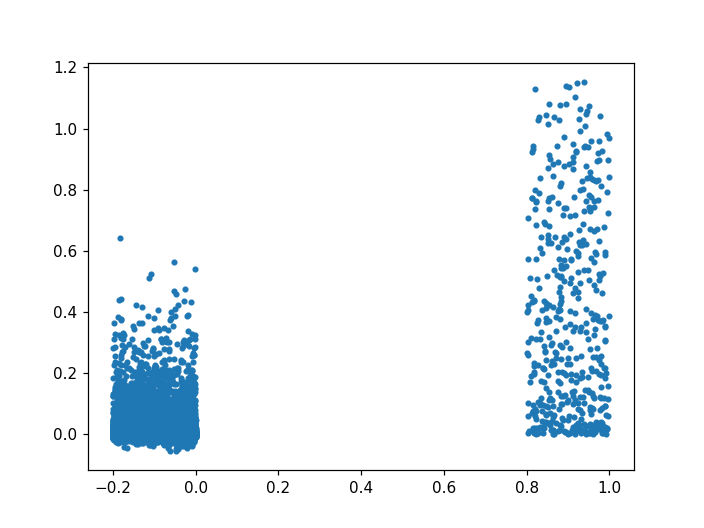

In [10]:
%matplotlib notebook
import random
y_shuff = [x+(random.random()*.2-.2) for x in y_]
plt.plot(y_shuff,y_pred_,'.')

In [11]:
#data[:,fishy_index[0][0]]
fishy_index = np.where((y_<.4)&(y_pred_>.5))
data.loc[fishy_index[0][1],:]

output                                                   0
source                                               n:καὶ
target                                               n:and
f:sLang                                               ugnt
f:tLang                                                 en
f1:sourceCorpusPermutationsFrequencyRatio         0.028209
f2:targetCorpusPermutationsFrequencyRatio         0.039188
f3:sourceAlignmentMemoryFrequencyRatio                   0
f4:targetAlignmentMemoryFrequencyRatio                   0
f5:frequencyRatioCorpusFiltered                      0.125
f6:frequencyRatioAlignmentMemoryFiltered                 0
f7:sourceCorpusLemmaPermutationsFrequencyRatio         0.0
f8:targetCorpusLemmaPermutationsFrequencyRatio         0.0
f9:sourceAlignmentMemoryLemmaFrequencyRatio              0
f10:targetAlignmentMemoryLemmaFrequencyRatio             0
f11:lemmaFrequencyRatioCorpusFiltered                  0.0
f12:lemmaFrequencyRatioAlignmentMemoryFiltered          

In [12]:
data.loc[fishy_index[0],["source","target"]]

,source,target
5377,n:ἐν,n:in
28139,n:καὶ,n:and
54900,n:ἐν,n:to
82054,n:κυρίῳ,n:lord
91416,n:ψυχῆς,n:soul


In [13]:
fishy_low = np.where((y_>.4)&(y_pred_<.001))
#print(fishy_low[0][2])
data.loc[fishy_low[0][1],:]

output                                                        1
source                                            n:τὴν:σύνεσίν
target                                                n:insight
f:sLang                                                    ugnt
f:tLang                                                      en
f1:sourceCorpusPermutationsFrequencyRatio              0.018182
f2:targetCorpusPermutationsFrequencyRatio              0.027778
f3:sourceAlignmentMemoryFrequencyRatio                        0
f4:targetAlignmentMemoryFrequencyRatio                        0
f5:frequencyRatioCorpusFiltered                             1.0
f6:frequencyRatioAlignmentMemoryFiltered                      0
f7:sourceCorpusLemmaPermutationsFrequencyRatio              0.0
f8:targetCorpusLemmaPermutationsFrequencyRatio              0.0
f9:sourceAlignmentMemoryLemmaFrequencyRatio                   0
f10:targetAlignmentMemoryLemmaFrequencyRatio                  0
f11:lemmaFrequencyRatioCorpusFiltered   

In [15]:
model.save_model( "../catboost_save.cbm" )